Оригинал кода был получен тут https://www.machinelearningmastery.ru/yolo-object-detection-with-opencv-and-python-21e50ac599e9/


In [1]:
import cv2
import numpy as np
import os
from google.colab import drive
drive.mount('/content/drive')
from google.colab.patches import cv2_imshow

# handle command line arguments
# ap = argparse.ArgumentParser()
# ap.add_argument('-i', '--image', required=True,
#                 help = 'path to input image')
# ap.add_argument('-c', '--config', required=True,
#                 help = 'path to yolo config file')
# ap.add_argument('-w', '--weights', required=True,
#                 help = 'path to yolo pre-trained weights')
# ap.add_argument('-cl', '--classes', required=True,
#                 help = 'path to text file containing class names')
# args = ap.parse_args()

Mounted at /content/drive


In [ ]:
# %cd "/content/drive/My Drive/Colab Notebooks/Yolo/YOLOv3"
# %pwd

/content/drive/My Drive/Colab Notebooks/Yolo/YOLOv3


'/content/drive/My Drive/Colab Notebooks/Yolo/YOLOv3'

In [ ]:
# !wget https://pjreddie.com/media/files/yolov3.weights

--2021-07-18 04:20:27--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  37.6MB/s    in 6.8s    

2021-07-18 04:20:35 (34.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# # read input image
# # image = cv2.imread('dog.jpg')
# def load_image(im):
#   image1 = cv2.imread(im)
#   # image = cv2.imread('mans_cars.jpg')
#   Width1 = image1.shape[1]
#   Height1 = image1.shape[0]
#   return image1,Width1,Height1

# image,Width,Height=load_image('/content/photo6-10.jpg')
# scale = 0.00392

# # read class names from text file
# classes = None
# with open('yolov3.txt', 'r') as f:
#     classes = [line.strip() for line in f.readlines()]

# # generate different colors for different classes 
# COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

# # read pre-trained model and config file
# net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# # create input blob 
# blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

# # set input blob for the network
# net.setInput(blob)

In [ ]:
# load_image('/content/photo6-10.jpg')

In [20]:
# read input image
# image = cv2.imread('dog.jpg')
image = cv2.imread('/content/pers6.jpg')


Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

# read class names from text file
classes = None
with open('/content/drive/MyDrive/lab13cv/yolov3.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# generate different colors for different classes 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

# read pre-trained model and config file
net = cv2.dnn.readNet('/content/drive/MyDrive/lab13cv/yolov3.weights', '/content/drive/MyDrive/lab13cv/yolov3.cfg')

# create input blob 
blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

# set input blob for the network
net.setInput(blob)

In [21]:
# import regex
# function to get the output layer names 
# in the architecture
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    # print(net.getUnconnectedOutLayers())
    # for i in net.getUnconnectedOutLayers():
    #   print(i[0])
    output_layers=[]
    for e in net.getUnconnectedOutLayers():
      st=str(e).split()
      print(st[0])
      # a=regex.findall('(\d+)',st[0])
      b=int(st[0])
      output_layers.append(layer_names[b-1])

    # output_layers = [layer_names[i[0]- 1] for i in net.getUnconnectedOutLayers()]

    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [22]:
# run inference through the network
# and gather predictions from output layers
a=get_output_layers(net)
outs = net.forward(a)

# initialization
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

# for each detetion from each output layer 
# get the confidence, class id, bounding box params
# and ignore weak detections (confidence < 0.5)
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

200
227
254


13
11
18
6
2
28
37
23
33
8
22
35


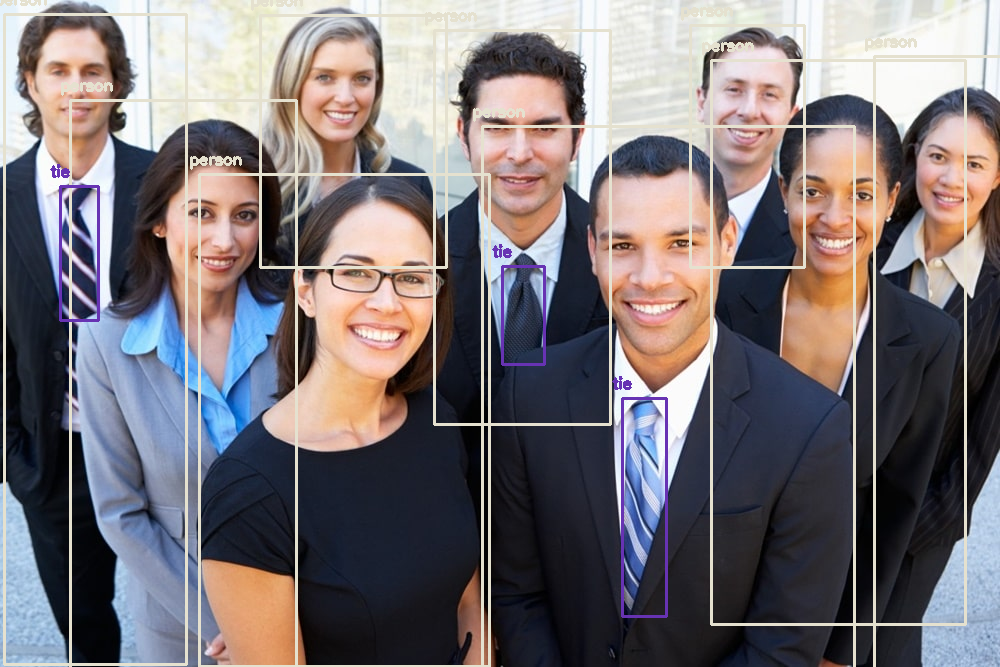

True

In [23]:
# apply non-max suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# go through the detections remaining
# after nms and draw bounding box
for i in indices:
    st=str(i).split()
    # print(st[0])
    # a=regex.findall('(\d+)',st[0])
    print(st[0])
    b=int(st[0])
    i = b
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

# display output image    
#cv2_imshow("object detection", image)
cv2_imshow(image)

# # wait until any key is pressed
# cv2.waitKey()
    
#  # save output image to disk
cv2.imwrite("/content/drive/MyDrive/lab13cv/detect/pers6.jpg", image)

# # release resources
# cv2.destroyAllWindows()